In [1]:
import numpy as np
import scipy.io
from multiprocessing import Pool
from functools import partial
import pickle
import scipy
import scipy.optimize
from sklearn.metrics import *
import scipy.stats as stat
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

## Import fit parameters

In [2]:
fits_single = pickle.load(open('fit_single_bound_with_transfer.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_bound_with_transfer.pickle', 'rb'))

## Import single and dual state model functions

In [3]:
from dual_model_with_transfer import dual_model_sudden, dual_model_gradual
from single_model_with_transfer import model_sudden, model_gradual

## Generate Data

In [7]:
model_errors_dual = np.zeros((60, 704))
model_errors_single = np.zeros((60, 704))
for participant in range(60):
    if participant%4 == 0 or participant%4 == 1:
        model_errors_dual[participant] = dual_model_sudden(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_sudden(704, fits_single[participant][0], fits_single[participant][1])[0]

    else:
        model_errors_dual[participant] = dual_model_gradual(704, fits_dual[participant][0], fits_dual[participant][1], fits_dual[participant][2], fits_dual[participant][3])[0]
        model_errors_single[participant] = model_gradual(704, fits_single[participant][0], fits_single[participant][1])[0]
        

## Save generated data

In [18]:
generated_by_dual = np.zeros((60, 12, 64))
generated_by_dual[:, 1:] = np.reshape(model_errors_dual, (60, 11, 64))

generated_by_single = np.zeros((60, 12, 64))
generated_by_single[:, 1:] = np.reshape(model_errors_single, (60, 11, 64))

pickle.dump(generated_by_dual, open('generated_by_dual.pickle', 'wb'))
pickle.dump(generated_by_single, open('generated_by_single.pickle', 'wb'))


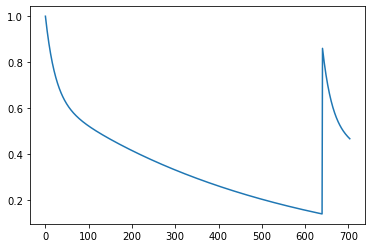